**Importing data and libraries**

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [2]:
#Importing the dataset
data = pd.read_csv(r"D:\chrome downloads\train_ctrUa4K.csv")
print(data.shape)
data

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Feature Engineering**

In [3]:
#Checking for missing values in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
k = data["LoanAmount"].mean()
print(k)
data['LoanAmount']=data['LoanAmount'].fillna(k)

146.41216216216216


In [5]:
k = data["Loan_Amount_Term"].mean()
print(k)
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(k)

342.0


In [6]:
k = data["Credit_History"].mode()
print(k)
data['Credit_History']=data['Credit_History'].fillna(1.0)


0    1.0
dtype: float64


In [7]:
k = data["Gender"].mode()
print(k)
data['Gender']=data['Gender'].fillna('Male')

0    Male
dtype: object


In [8]:
k = data["Married"].mode()
print(k)
data['Married']=data['Married'].fillna('Yes')

0    Yes
dtype: object


In [9]:
k = data["Self_Employed"].mode()
print(k)
data['Self_Employed']=data['Self_Employed'].fillna('No')

0    No
dtype: object


In [10]:
data=data.dropna(axis=0)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


**VISUALIZATION**

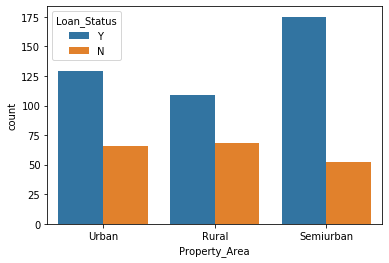

In [11]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

It seems like mostly Semi-Urban Area are getting Approval for Loan

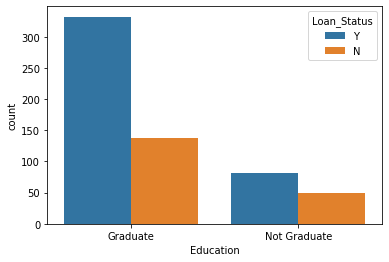

In [12]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

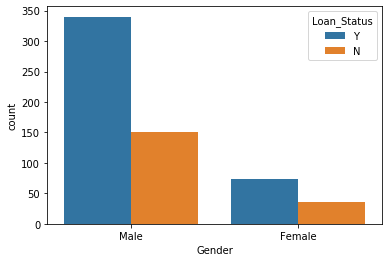

In [13]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

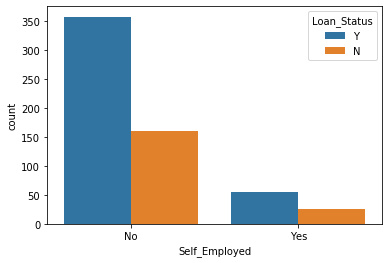

In [14]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

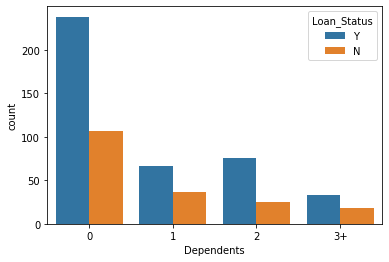

In [15]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

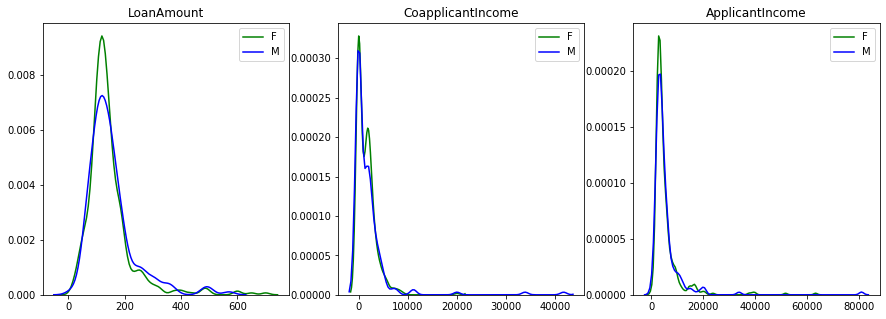

In [16]:
#Visualizing the features in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(1,3,figsize=(15,5))
for i in range(7,10):
    plt.subplot(1,3,10-i)
    plt.title(data.columns[i-1])
    sns.kdeplot(data.loc[data['Loan_Status'] == 'Y' , data.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(data.loc[data['Loan_Status'] == 'N' , data.columns[i-1]], color= 'blue', label='M')

In [17]:
data=data.drop(columns='Loan_ID')

In [18]:
data = pd.get_dummies(data,prefix=None,drop_first=True)
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [19]:
#Splitting dataset into training and test sets
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.25, 
                     random_state=0, 
                     stratify=y)
print(y_train.shape,X_train.shape,y_test.shape,X_test.shape)

(449,) (449, 14) (150,) (150, 14)


**MODELLING**

Logistic Regression
Accuracy on training set: 0.8040
Accuracy on test set: 0.7800
Predicted value:  [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
Precision, Recall and fscore: 0.78 0.78 0.78


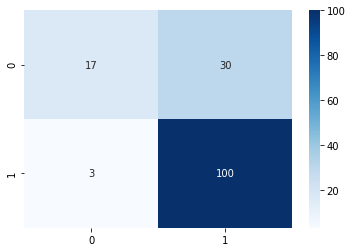

In [20]:
# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(logreg.score(X_test, y_test)))

y_pred = logreg.predict(X_test)
print("Predicted value: ",y_pred)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='')

Decision Tree
Accuracy on training set: 0.8218
Accuracy on test set: 0.8000
Predicted value:  [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
Precision, Recall and fscore: 0.8 0.8 0.8000000000000002


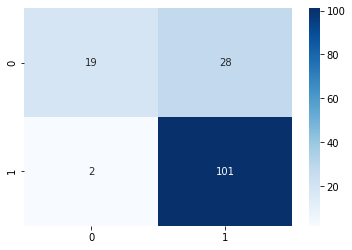

In [21]:
#Train decision tree model


DTclf = DecisionTreeClassifier(max_depth=4)
DTclf.fit(X_train, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.4f}".format(DTclf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(DTclf.score(X_test, y_test)))

y_pred = DTclf.predict(X_test)
print("Predicted value: ",y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='')

Support Vector Machine
Accuracy on training set: 0.8998
Accuracy on test set: 0.7933
Precision, Recall and fscore: 0.7933333333333333 0.7933333333333333 0.7933333333333333


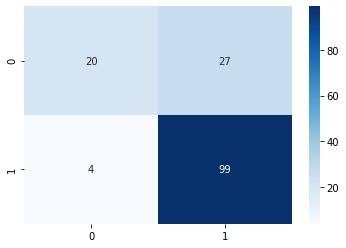

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=54,max_depth=4)
gbc.fit(X_train, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.4f}".format(gbc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbc.score(X_test, y_test)))

y_pred = gbc.predict(X_test)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='')

Support Vector Machine
Accuracy on training set: 0.8174
Accuracy on test set: 0.8200
Precision, Recall and fscore: 0.82 0.82 0.82


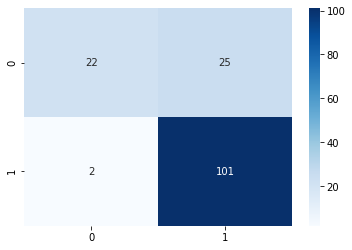

In [23]:
from  sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=10,learning_rate=1)
AdaBoost.fit(X_train, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.4f}".format(AdaBoost.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(AdaBoost.score(X_test, y_test)))

y_pred = AdaBoost.predict(X_test)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='')

**MODEL DEPLOY ON TEST DATA**

In [24]:
test_df = pd.read_csv(r"D:\test_lAUu6dG.csv")
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [25]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
test_df = test_df.dropna(axis=0)
test_df = test_df.drop(columns='Loan_ID')
test_df = pd.get_dummies(test_df,prefix=None,drop_first=True)

In [27]:
k = print(AdaBoost.predict(test_df))

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
